In [35]:
import pandas as pd
import numpy as np
df=pd.read_csv("data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [36]:
df2015=df.where(df['Date'].str.contains('2015')).dropna()
df2015['Date']=df2015['Date'].str[5:]

In [37]:
df['Date']=df['Date'].str[5:]
df=df.where(df['Date']!='02-29')

In [38]:
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,11-12,TMAX,22.0
1,USC00208972,04-29,TMIN,56.0
2,USC00200032,05-26,TMAX,278.0
3,USC00205563,11-11,TMAX,139.0
4,USC00200230,02-27,TMAX,-106.0


In [39]:
dfhigh=df.where(df['Element']=='TMAX')
dfhigh.head()

,ID,Date,Element,Data_Value
0,USW00094889,11-12,TMAX,22.0
1,NaN,NaN,NaN,NaN
2,USC00200032,05-26,TMAX,278.0
3,USC00205563,11-11,TMAX,139.0
4,USC00200230,02-27,TMAX,-106.0


In [40]:
dfhigh=dfhigh.dropna()
dfhigh.shape

(83020, 4)

In [41]:
dflow=df.where(df['Element']=='TMIN')
dflow.head()

,ID,Date,Element,Data_Value
0,NaN,NaN,NaN,NaN
1,USC00208972,04-29,TMIN,56.0
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [42]:
dflow=dflow.dropna()

In [43]:
dflow.head()

,ID,Date,Element,Data_Value
1,USC00208972,04-29,TMIN,56.0
6,USC00207308,06-29,TMIN,144.0
8,USW00004848,12-14,TMIN,-16.0
11,USC00205822,05-29,TMIN,28.0
12,USC00203712,10-17,TMIN,17.0


In [44]:
high=dfhigh.groupby('Date')['Data_Value'].max()
low=dflow.groupby('Date')['Data_Value'].min()
high.head()

Date
01-01    156.0
01-02    139.0
01-03    133.0
01-04    106.0
01-05    128.0
Name: Data_Value, dtype: float64

In [45]:
dates=list(range(1,366))

In [46]:
x=np.linspace(1,365,365)
y=np.linspace(1,365,365)

In [47]:
high2015=df2015.groupby('Date')['Data_Value'].max()
low2015=df2015.groupby('Date')['Data_Value'].min()

In [48]:
record_high2015 = high2015[high2015 >= high.reindex_like(high2015)]
print(record_high2015.shape)
x = [n for n in range(0,365) if (high2015.iloc[n] >= high.iloc[n]) ]
print(x)

(44,)
[39, 106, 126, 127, 129, 130, 136, 137, 207, 209, 225, 230, 249, 250, 258, 259, 260, 269, 270, 271, 292, 305, 306, 307, 308, 309, 319, 321, 322, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 355, 356, 357, 358, 359]


In [49]:
record_low2015 = low2015[low2015 <= low.reindex_like(low2015)]
y = [n for n in range(0,365) if (low2015.iloc[n] <= low.iloc[n]) ]


In [50]:
import matplotlib.pyplot as plt


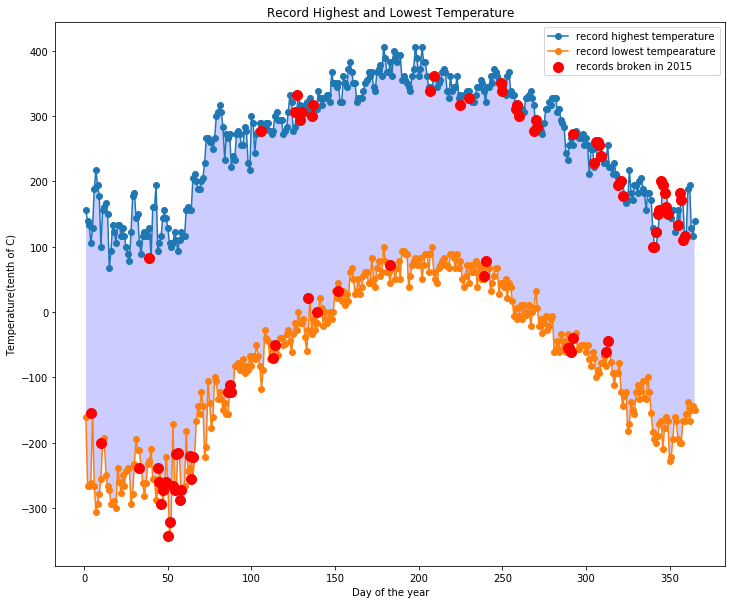

In [63]:

plt.figure(figsize=(12,10))
plt.xlabel('Day of the year')
plt.ylabel("Temperature(tenth of C)")
plt.title('Record Highest and Lowest Temperature')

plt.plot(dates,high,'-o',dates,low,'-o')
plt.legend(['record highest temperature','record lowest tempearature'])
plt.scatter(x,record_high2015,s=100,c='red',zorder=4)
plt.scatter(y,record_low2015,s=100,c='red',zorder=4)
plt.legend(['record highest temperature','record lowest tempearature','records broken in 2015'])

plt.gca().fill_between(dates,high,low,facecolor='blue',alpha=0.2)
plt.show()

